In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Reshape, Activation, Flatten
from keras.layers import Input, BatchNormalization
from keras.losses import mean_squared_error
from keras.optimizers import Adam

from utils import LossHistory, plotHistory, visualization
from keras_capsnet.layer.capsnet import PrimaryCaps, Caps, ClassesCaps, Mask
from keras_capsnet.losses import margin
from keras_capsnet.activations import squash

Using TensorFlow backend.


# Args

In [2]:
num_class = 10
input_shape = (28, 28, 1)

# Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(-1, *input_shape).astype('float32') / 255
x_test = x_test.reshape(-1, *input_shape).astype('float32') / 255

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

# Model

In [5]:
x = Input(shape=input_shape)
y = Input(shape=(num_class,))

encoder = Convolution2D(filters=256, kernel_size=(9, 9), padding='same') (x)
encoder = MaxPooling2D() (encoder)
encoder = BatchNormalization() (encoder)
encoder = Activation('relu') (encoder)

encoder = Convolution2D(filters=256, kernel_size=(3, 3), padding='same') (encoder)
encoder = MaxPooling2D() (encoder)
encoder = BatchNormalization() (encoder)
encoder = Activation('relu') (encoder)

encoder = Flatten() (encoder)
output = Dense(10, activation='softmax', name='capsule') (encoder)

model = Model(inputs=x, outputs=output)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       20992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 256)         0         
__________

# Training

In [7]:
model.compile(loss=margin(),
                optimizer=Adam(lr=1e-3),
                metrics={'capsule': 'accuracy'})

In [8]:
history = LossHistory(metrics=('loss', 'acc'))
hist = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 618us/step - loss: 0.0993 - acc: 0.8726 - val_loss: 0.0297 - val_acc: 0.9604
Epoch 2/5
60000/60000 [==============================] - 36s 596us/step - loss: 0.0245 - acc: 0.9674 - val_loss: 0.0206 - val_acc: 0.9729
Epoch 3/5
60000/60000 [==============================] - 36s 597us/step - loss: 0.0198 - acc: 0.9740 - val_loss: 0.0214 - val_acc: 0.9718
Epoch 4/5
60000/60000 [==============================] - 36s 595us/step - loss: 0.0172 - acc: 0.9776 - val_loss: 0.0118 - val_acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 35s 580us/step - loss: 0.0176 - acc: 0.9773 - val_loss: 0.0146 - val_acc: 0.9808


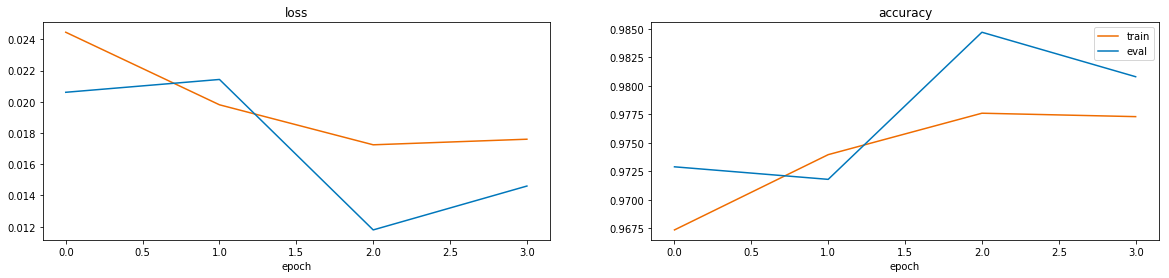

In [9]:
plotHistory(history.metrics)